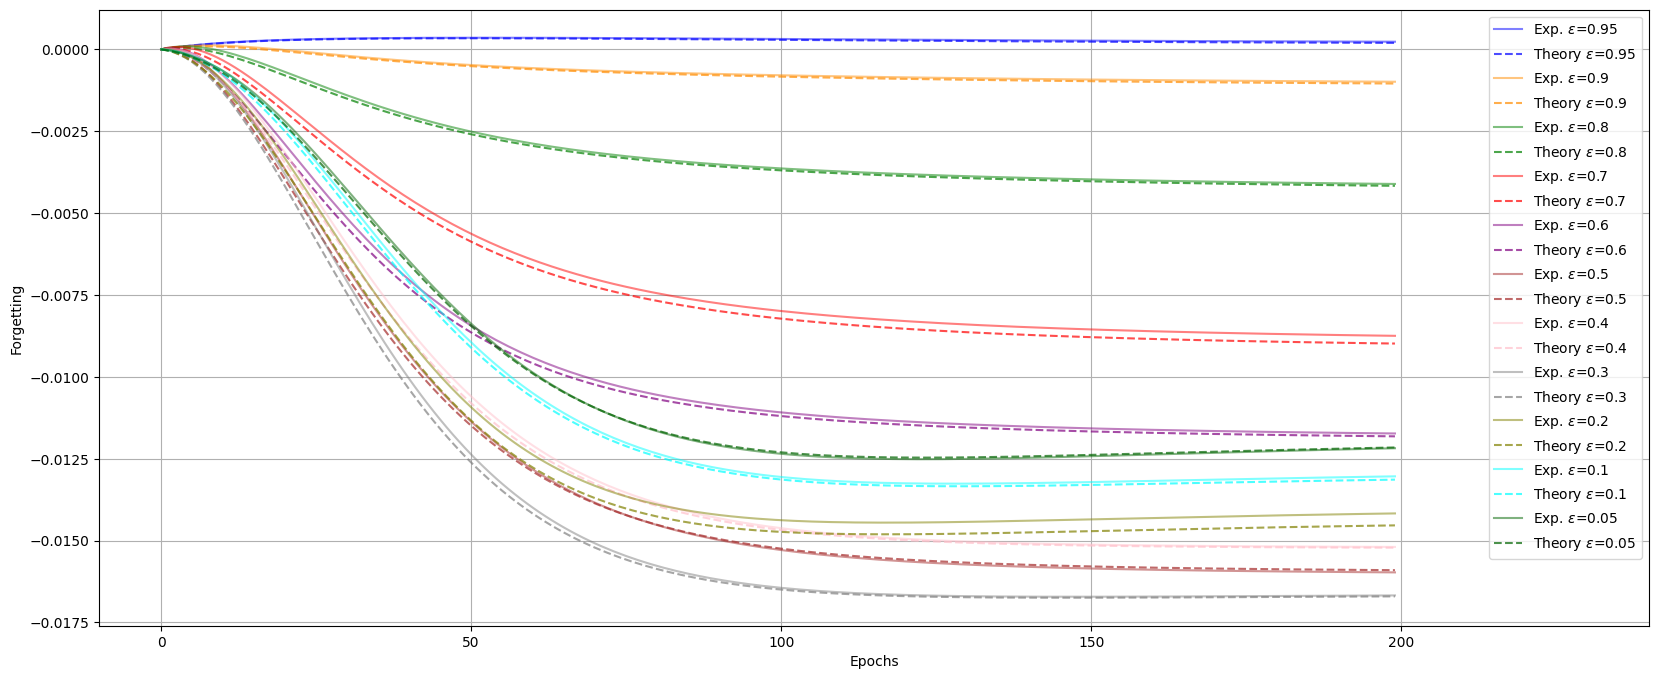

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

epochs=200
colors = ['blue', 'darkorange','green','red','purple','brown','pink', 'gray', 'olive', 'cyan' , 'darkgreen', 'indigo', 'maroon', 'navy']

fig = plt.figure(figsize=(20,8))

sim = np.array([0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95])

for i,p in enumerate(sim):
    l = torch.load(f'Losses/SYNT_RELU/losses_{p}_exp', weights_only=True)
    th = torch.load(f'Losses/SYNT_RELU/losses_{p}_th', weights_only=True)
    plt.plot(l[0][epochs] - l[0][epochs:], label=f'Exp. $\epsilon$={round(1.0-p,2)}', color = colors[i], alpha =0.5)
    plt.plot(th[0][epochs] - th[0][epochs:], label=f'Theory $\epsilon$={round(1.0-p,2)}', linestyle='--', color = colors[i], alpha =0.7)

#for i,p in enumerate(sim):
#    l = torch.load(f'Losses/SYNT/losses_{p}_exp', weights_only=True)
#    th = torch.load(f'Losses/SYNT/losses_{p}_th', weights_only=True)
#    plt.plot(l[0][epochs] - l[0][epochs:], label=f'Exp. $\epsilon$={round(1.0-p,2)}', color = colors[i], alpha =0.5, linestyle='-.')
#    plt.plot(th[0][epochs] - th[0][epochs:], label=f'Theory $\epsilon$={round(1.0-p,2)}', linestyle=':', color = colors[i], alpha =0.7)


plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.xlim(-10,240)
plt.ylabel('Forgetting')
plt.show()

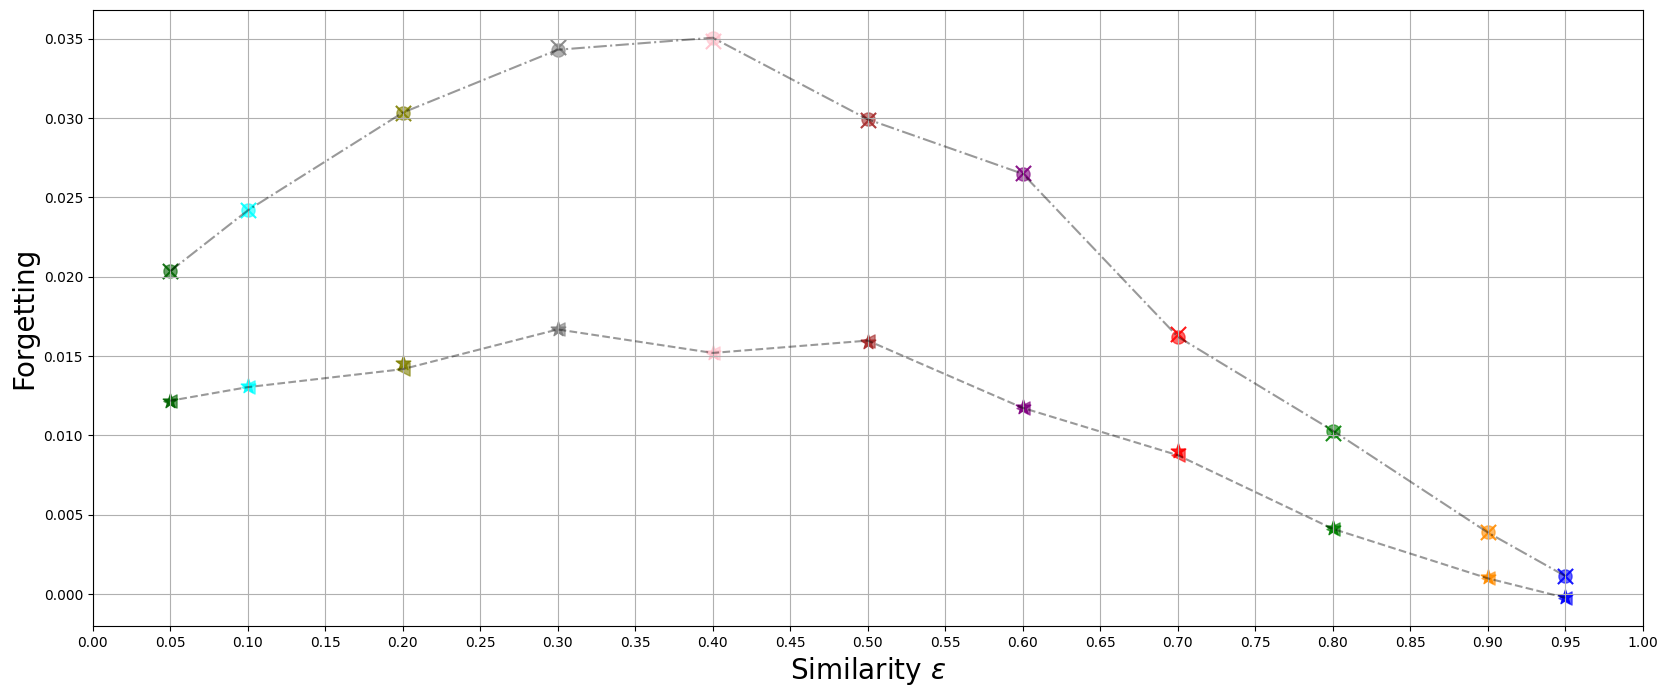

In [4]:
fig = plt.figure(figsize=(20,8))
forg = []

sim = np.array([0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95])

for i,p in enumerate(sim):
    l = torch.load(f'Losses/SYNT/losses_{p}_exp', weights_only=True)
    th = torch.load(f'Losses/SYNT/losses_{p}_th', weights_only=True)
    plt.scatter(1.0-p, l[0][-1] - l[0][epochs], color = colors[i], alpha =0.6,marker='o', s=90)
    plt.scatter(1.0-p, th[0][-1] - th[0][epochs], color = colors[i], alpha =0.9, marker='x', s=120)
    forg.append(l[0][-1] - l[0][epochs])

plt.plot(1-sim,forg, alpha=0.4, linestyle='-.', color='black')

forg = []

for i,p in enumerate(sim):
    l = torch.load(f'Losses/SYNT_RELU/losses_{p}_exp', weights_only=True)
    th = torch.load(f'Losses/SYNT_RELU/losses_{p}_th', weights_only=True)
    plt.scatter(1.0-p, l[0][-1] - l[0][epochs], color = colors[i], alpha =0.6,marker='<', s=90)
    plt.scatter(1.0-p, th[0][-1] - th[0][epochs], color = colors[i], alpha =0.9, marker='*', s=120)
    forg.append(l[0][-1] - l[0][epochs])

plt.plot(1-sim,forg, alpha=0.4, linestyle='--', color='black')

plt.grid()
plt.xlabel('Similarity $\epsilon$', fontsize=20)
plt.ylabel('Forgetting', fontsize=20)
plt.xticks(np.arange(0,1.05,0.05))
plt.xlim(0,1.0)
plt.show()

In [5]:
fig = plt.figure(figsize=(20,8))

sim = np.array([0.1,0.2,0.3])

for i,p in enumerate(sim):
    l = torch.load(f'Losses/SYNT/losses_{0.1}_{p}_exp', weights_only=True)
    th = torch.load(f'Losses/SYNT/losses_{0.1}_{p}_th', weights_only=True)
    plt.scatter(1.0-p, l[0][-1] - l[0][epochs], color = colors[i], alpha =0.6,marker='o', s=90)
    plt.scatter(1.0-p, th[0][-1] - th[0][epochs], color = colors[i], alpha =0.9, marker='x', s=120)
    forg.append(l[0][-1] - l[0][epochs])

plt.plot(1-sim,forg, alpha=0.4, linestyle='-.', color='black')


IndexError: index 200 is out of bounds for dimension 0 with size 9

<Figure size 2000x800 with 0 Axes>

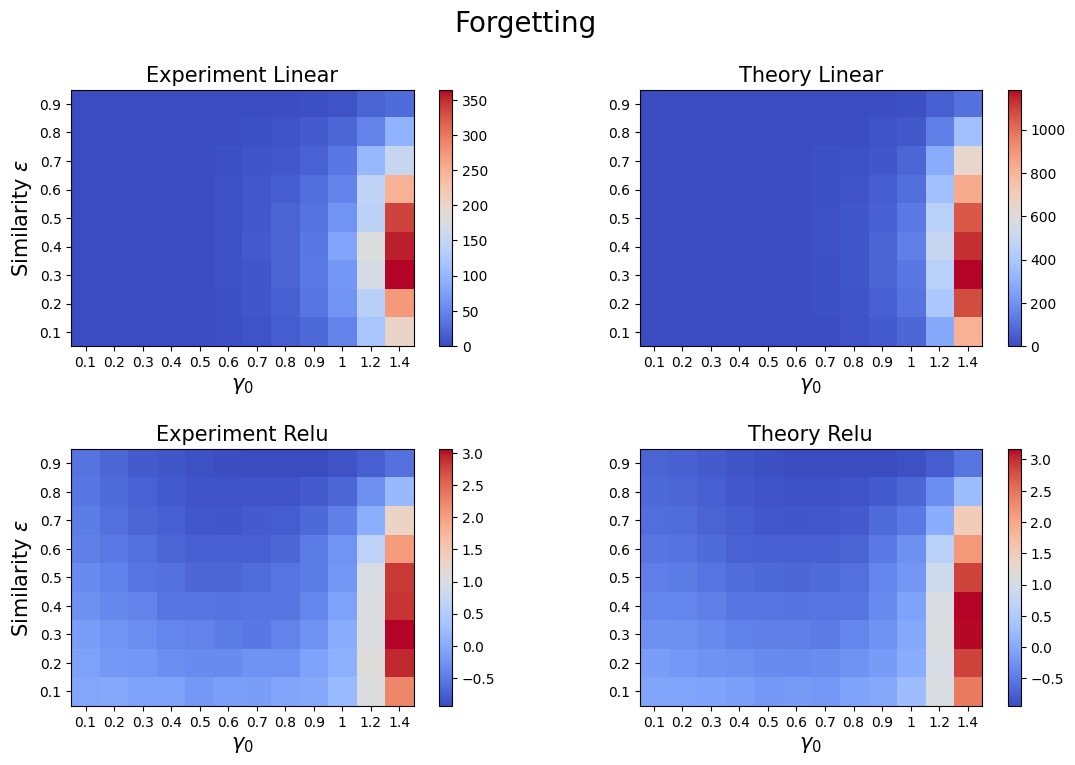

In [6]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
plt.suptitle('Forgetting', fontsize=20)

l = torch.load(f'Losses/SYNT/losses_exp', weights_only=True)
th = torch.load(f'Losses/SYNT/losses_th', weights_only=True)
l_relu = torch.load(f'Losses/SYNT_RELU/losses_exp', weights_only=True)
th_relu = torch.load(f'Losses/SYNT_RELU/losses_th', weights_only=True)

gammas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4]
percents = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

same_scale = False

exp_loss = (l[:,:,0,-1] - l[:,:,0,epochs])/l[:,:,0,epochs]
th_loss = (th[:,:,0,-1] - th[:,:,0,epochs])/th[:,:,0,epochs]
exp_loss_relu = (l_relu[:,:,0,-1] - l_relu[:,:,0,epochs])/l_relu[:,:,0,epochs]
th_loss_relu = (th_relu[:,:,0,-1] - th_relu[:,:,0,epochs])/th_relu[:,:,0,epochs]

if same_scale:
    stacked = torch.stack([exp_loss, th_loss, exp_loss_relu, th_loss_relu])
    vmax = torch.max(stacked)
    vmin = torch.min(stacked)
else:
    vmax = None
    vmin = None

a = ax[0,0].imshow(exp_loss.T, cmap='coolwarm', vmax=vmax, vmin=vmin)
ax[0,0].set_yticks(np.arange(0,len(percents),1)[::-1],percents)
ax[0,0].set_xticks(np.arange(0,len(gammas),1),gammas)
ax[0,0].set_xlabel('$\gamma_0$',  fontsize=15)
ax[0,0].set_ylabel('Similarity $\epsilon$',  fontsize=15)
ax[0,0].set_title('Experiment Linear', fontsize=15)
plt.colorbar(a, ax=ax[0,0])

a = ax[0,1].imshow(th_loss.T , cmap='coolwarm', vmax=vmax, vmin=vmin)
ax[0,1].set_yticks(np.arange(0,len(percents),1)[::-1],percents)
ax[0,1].set_xticks(np.arange(0,len(gammas),1),gammas)
ax[0,1].set_xlabel('$\gamma_0$',  fontsize=15)
ax[0,1].set_title('Theory Linear', fontsize=15)
plt.colorbar(a, ax=ax[0,1])

a = ax[1,0].imshow(exp_loss_relu.T, cmap='coolwarm', vmax=vmax, vmin=vmin)
ax[1,0].set_yticks(np.arange(0,len(percents),1)[::-1],percents)
ax[1,0].set_xticks(np.arange(0,len(gammas),1),gammas)
ax[1,0].set_xlabel('$\gamma_0$',  fontsize=15)
ax[1,0].set_ylabel('Similarity $\epsilon$',  fontsize=15)
ax[1,0].set_title('Experiment Relu', fontsize=15)
plt.colorbar(a, ax=ax[1,0])

a = ax[1,1].imshow(th_loss_relu.T , cmap='coolwarm', vmax=vmax, vmin=vmin)
ax[1,1].set_yticks(np.arange(0,len(percents),1)[::-1],percents)
ax[1,1].set_xticks(np.arange(0,len(gammas),1),gammas)
ax[1,1].set_xlabel('$\gamma_0$',  fontsize=15)
ax[1,1].set_title('Theory Relu', fontsize=15)
plt.colorbar(a, ax=ax[1,1])

plt.subplots_adjust(wspace=0.1, hspace=0.4) 
#plt.tight_layout()
plt.show()

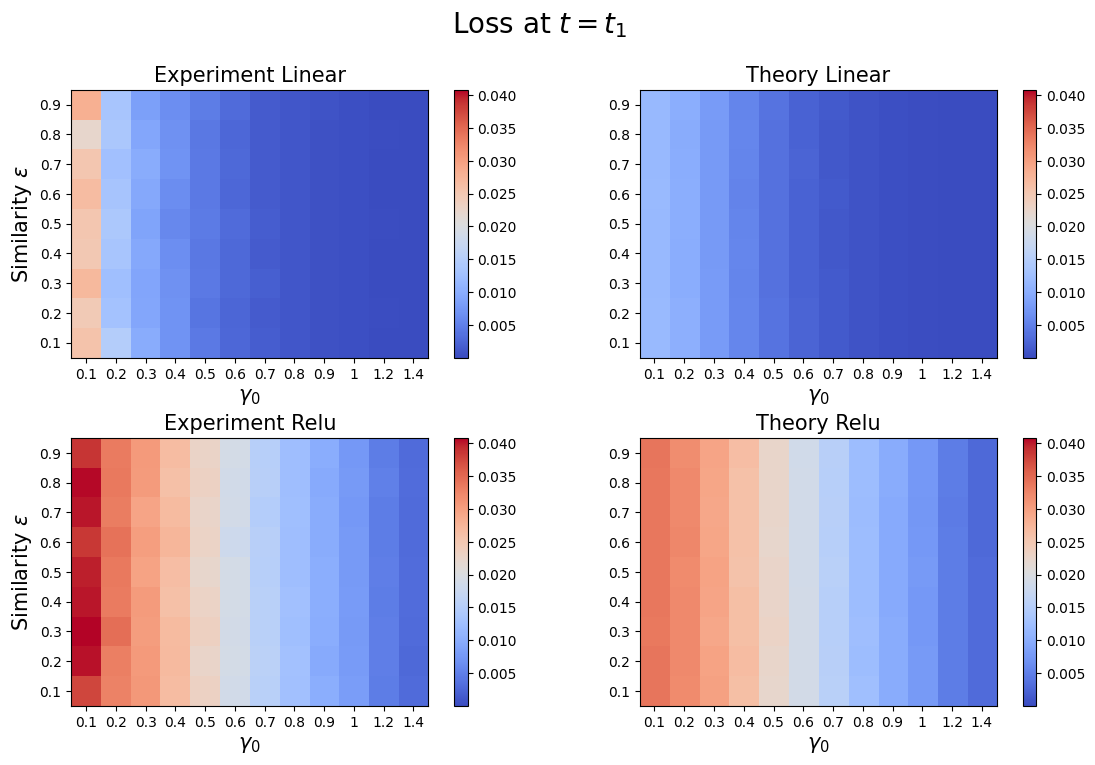

In [7]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
plt.suptitle('Loss at $t=t_1$', fontsize=20)

l = torch.load(f'Losses/SYNT/losses_exp', weights_only=True)
th = torch.load(f'Losses/SYNT/losses_th', weights_only=True)
l_relu = torch.load(f'Losses/SYNT_RELU/losses_exp', weights_only=True)
th_relu = torch.load(f'Losses/SYNT_RELU/losses_th', weights_only=True)

gammas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4]
percents = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

same_scale = True

exp_loss = l[:,:,0,epochs]
th_loss = th[:,:,0,epochs]
exp_loss_relu = l_relu[:,:,0,epochs] 
th_loss_relu = th_relu[:,:,0,epochs]

if same_scale:
    stacked = torch.stack([exp_loss, th_loss, exp_loss_relu, th_loss_relu])
    vmax = torch.max(stacked)
    vmin = torch.min(stacked)
else:
    vmax = None
    vmin = None

a = ax[0,0].imshow(exp_loss.T, cmap='coolwarm', vmax=vmax, vmin=vmin)
ax[0,0].set_yticks(np.arange(0,len(percents),1)[::-1],percents)
ax[0,0].set_xticks(np.arange(0,len(gammas),1),gammas)
ax[0,0].set_xlabel('$\gamma_0$',  fontsize=15)
ax[0,0].set_ylabel('Similarity $\epsilon$',  fontsize=15)
ax[0,0].set_title('Experiment Linear', fontsize=15)
plt.colorbar(a, ax=ax[0,0])

a = ax[0,1].imshow(th_loss.T , cmap='coolwarm', vmax=vmax, vmin=vmin)
ax[0,1].set_yticks(np.arange(0,len(percents),1)[::-1],percents)
ax[0,1].set_xticks(np.arange(0,len(gammas),1),gammas)
ax[0,1].set_xlabel('$\gamma_0$',  fontsize=15)
ax[0,1].set_title('Theory Linear', fontsize=15)
plt.colorbar(a, ax=ax[0,1])

a = ax[1,0].imshow(exp_loss_relu.T, cmap='coolwarm', vmax=vmax, vmin=vmin)
ax[1,0].set_yticks(np.arange(0,len(percents),1)[::-1],percents)
ax[1,0].set_xticks(np.arange(0,len(gammas),1),gammas)
ax[1,0].set_xlabel('$\gamma_0$',  fontsize=15)
ax[1,0].set_ylabel('Similarity $\epsilon$',  fontsize=15)
ax[1,0].set_title('Experiment Relu', fontsize=15)
plt.colorbar(a, ax=ax[1,0])

a = ax[1,1].imshow(th_loss_relu.T , cmap='coolwarm', vmax=vmax, vmin=vmin)
ax[1,1].set_yticks(np.arange(0,len(percents),1)[::-1],percents)
ax[1,1].set_xticks(np.arange(0,len(gammas),1),gammas)
ax[1,1].set_xlabel('$\gamma_0$',  fontsize=15)
ax[1,1].set_title('Theory Relu', fontsize=15)
plt.colorbar(a, ax=ax[1,1])

plt.subplots_adjust(wspace=0.1, hspace=0.3) 
#plt.tight_layout()
plt.show()

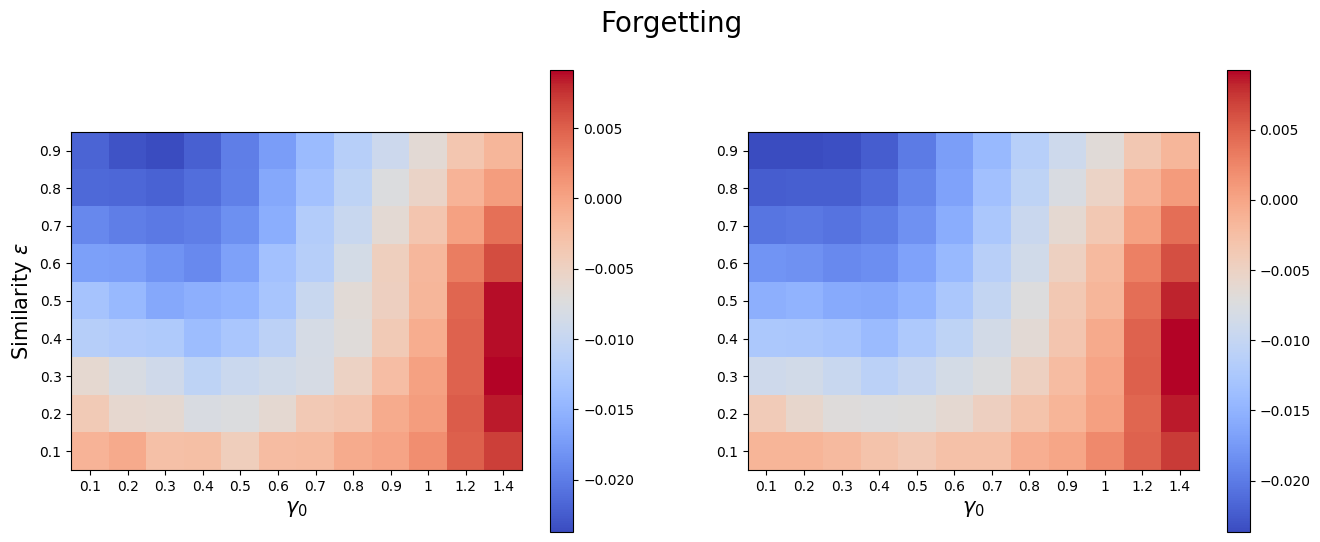

In [8]:
l = torch.load(f'Losses/SYNT_RELU/losses_exp', weights_only=True)
th = torch.load(f'Losses/SYNT_RELU/losses_th', weights_only=True)

fig, ax = plt.subplots(1,2, figsize=(16,6))
plt.suptitle('Forgetting', fontsize=20)

exp_loss = l[:,:,0,-1] - l[:,:,0,epochs]
th_loss = th[:,:,0,-1] - th[:,:,0,epochs]

a = ax[0].imshow(exp_loss.T, cmap='coolwarm')
ax[0].set_yticks(np.arange(0,len(percents),1)[::-1],percents)
ax[0].set_xticks(np.arange(0,len(gammas),1),gammas)
ax[0].set_xlabel('$\gamma_0$',  fontsize=15)
ax[0].set_ylabel('Similarity $\epsilon$',  fontsize=15)
plt.colorbar(a, ax=ax[0])

a = ax[1].imshow(th_loss.T , cmap='coolwarm')
ax[1].set_yticks(np.arange(0,len(percents),1)[::-1],percents)
ax[1].set_xticks(np.arange(0,len(gammas),1),gammas)
ax[1].set_xlabel('$\gamma_0$',  fontsize=15)
plt.colorbar(a, ax=ax[1])

plt.show()

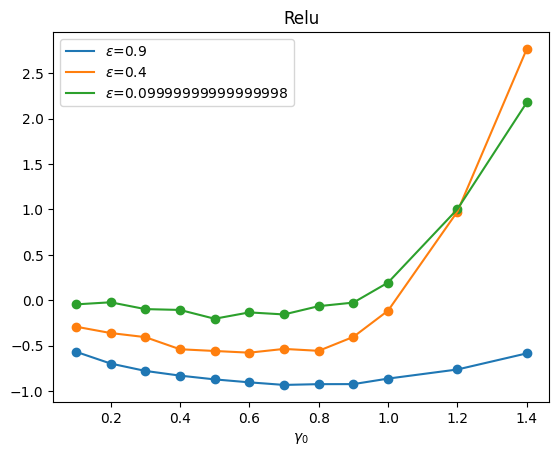

In [9]:
for j in [0,5,8]:
    b = [(l_relu[i,j,0,-1]-l_relu[i,j,0,epochs-1])/l_relu[i,j,0,epochs-1] for i in range(len(gammas))]
    plt.plot(gammas,b, label=f'$\epsilon$={1-percents[j]}')
    plt.scatter(gammas, b)

plt.title('Relu')
plt.xlabel('$\gamma_0$')
plt.legend()
plt.show()

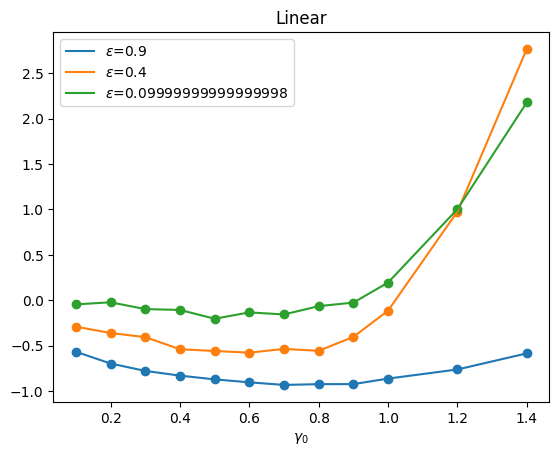

In [10]:
for j in [0,5,8]:
    b = [(l[i,j,0,-1]-l[i,j,0,epochs-1])/l[i,j,0,epochs-1] for i in range(len(gammas))]
    plt.plot(gammas,b, label=f'$\epsilon$={1-percents[j]}')
    plt.scatter(gammas, b)

plt.title('Linear')
plt.xlabel('$\gamma_0$')
plt.legend()
plt.show()

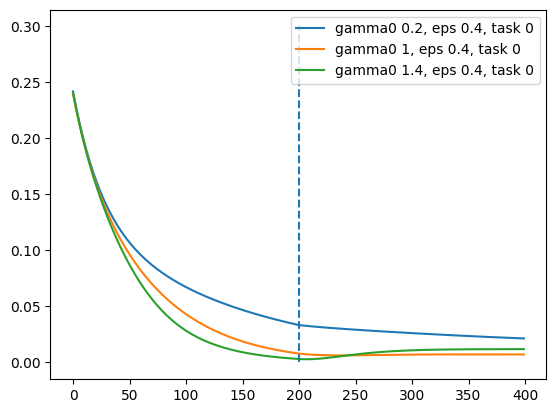

In [11]:
plt.plot(l_relu[1,5,0,:], label=f'gamma0 {gammas[1]}, eps {1-percents[5]}, task {0}')
plt.plot(l_relu[9,5,0,:], label=f'gamma0 {gammas[9]}, eps {1-percents[5]}, task {0}')
plt.plot(l_relu[-1,5,0,:], label=f'gamma0 {gammas[-1]}, eps {1-percents[5]}, task {0}')
plt.vlines(epochs,0,0.3, linestyle='--')
plt.legend()

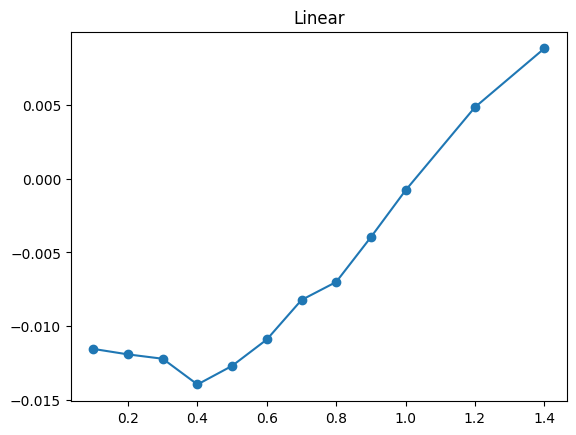

In [12]:
a = [l[i,5,0,-1]-l[i,5,0,epochs] for i in range(len(gammas))]
plt.plot(gammas,a)
plt.scatter(gammas, a)
plt.title('Linear')
plt.show()

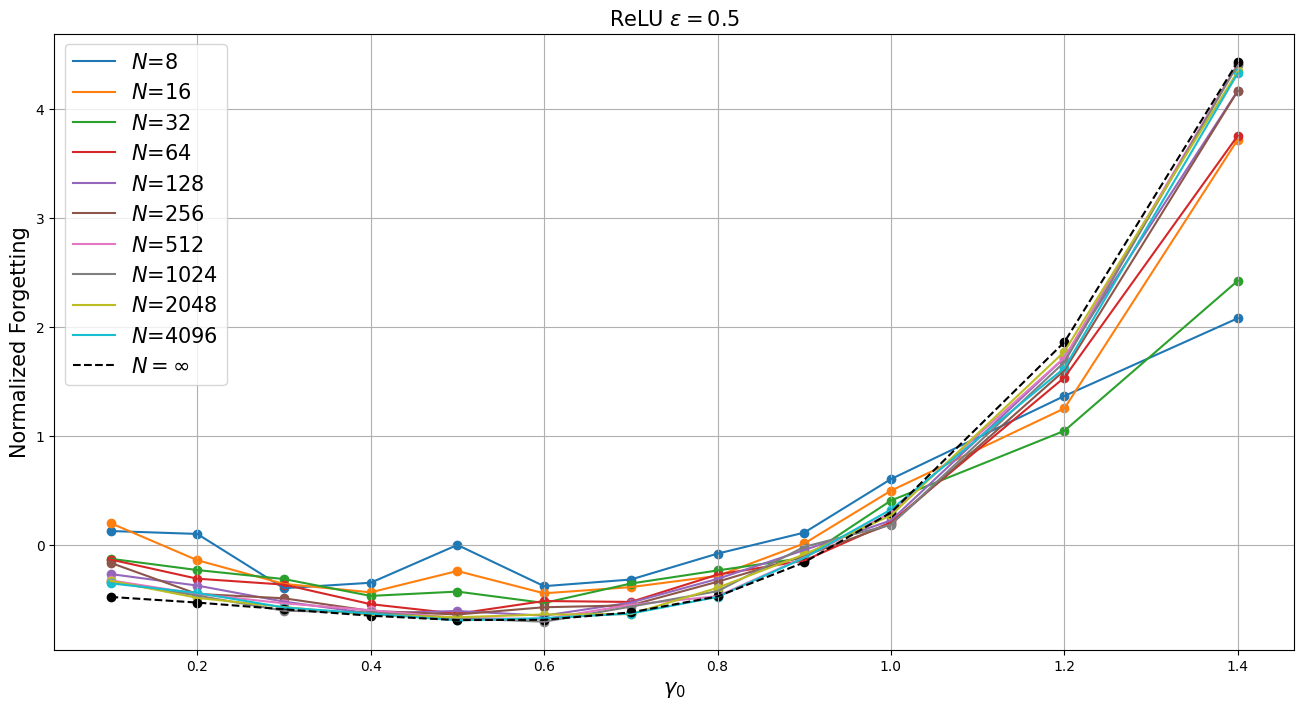

In [13]:
l_w = torch.load(f'Losses/SYNT_RELU/losses_gamma-widths_2_exp', weights_only=True)
th_w = torch.load(f'Losses/SYNT_RELU/losses_gamma-widths_2_th', weights_only=True)
widths = [8,16,32,64,128,256,512,1024,2048,4096]

fig = plt.figure(figsize=(16,8)) 

for j in range(l_w.shape[1]):
    b = [(l_w[i,j,0,-1]-l_w[i,j,0,epochs])/(l_w[i,j,0,epochs]+1E-4) for i in range(len(gammas))]
    plt.plot(gammas,b, label=f'$N$={widths[j]}')
    plt.scatter(gammas, b)


b = [(th_w[i,-1,0,-1]-th_w[i,-1,0,epochs])/(th_w[i,-1,0,epochs]+1E-4) for i in range(len(gammas))]
plt.plot(gammas,b, label='$N=\infty$', linestyle='--', color='black')
plt.scatter(gammas, b, color='black')

plt.title('ReLU $\epsilon = 0.5$',fontsize=15)
plt.xlabel('$\gamma_0$',fontsize=15)
plt.ylabel('Normalized Forgetting',fontsize=15)
#plt.yscale('log')
plt.legend(fontsize=15)
plt.grid()
plt.show()

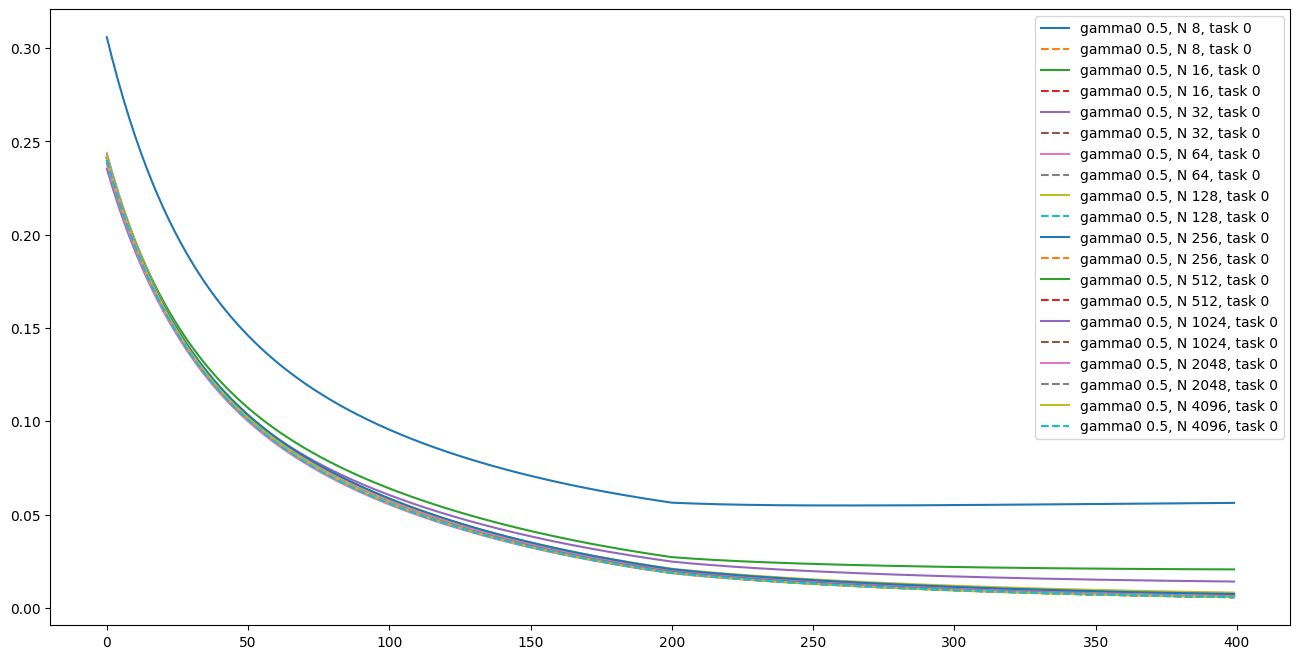

In [14]:
fig = plt.figure(figsize=(16,8))

for i in range(l_w.shape[1]):
    plt.plot(l_w[-8,i,0,:], label=f'gamma0 {gammas[-8]}, N {widths[i]}, task 0')
    plt.plot(th_w[-8,i,0,:], label=f'gamma0 {gammas[-8]}, N {widths[i]}, task 0', linestyle='--')
plt.legend()

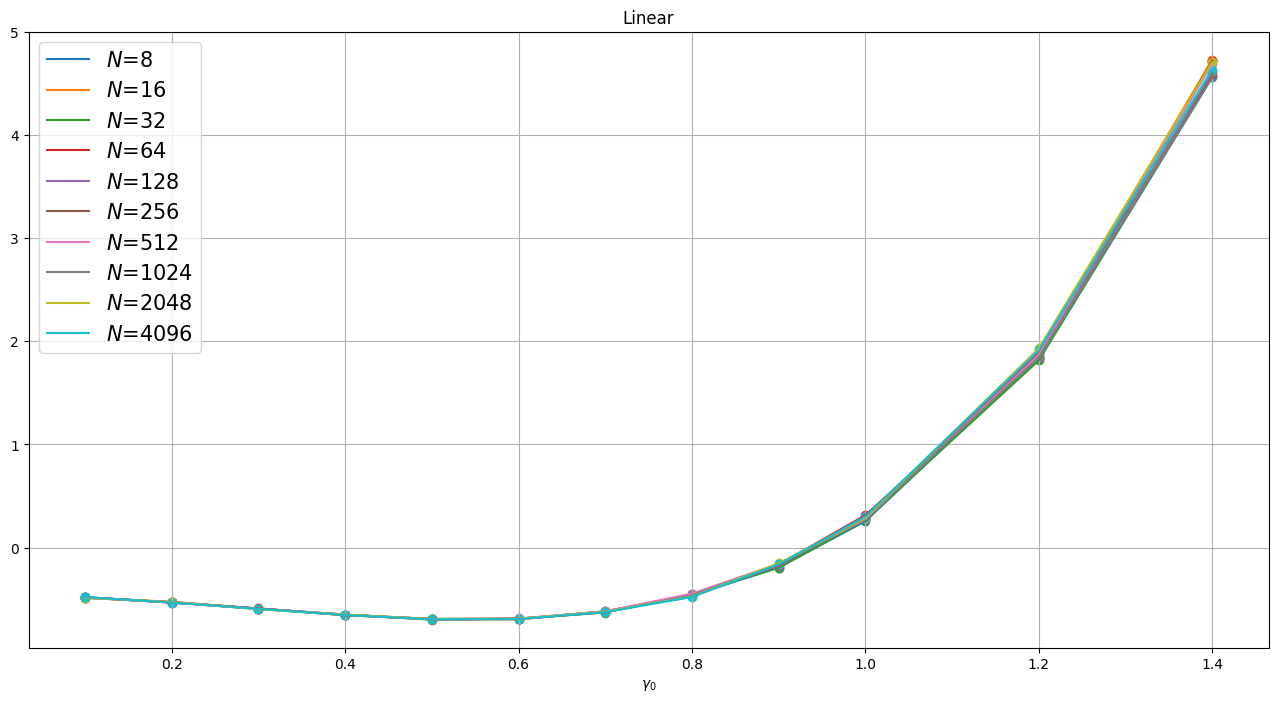

In [15]:
fig = plt.figure(figsize=(16,8)) 

for j in range(th_w.shape[1]):
    b = [(th_w[i,j,0,-1]-th_w[i,j,0,epochs])/th_w[i,j,0,epochs] for i in range(len(gammas))]
    plt.plot(gammas,b, label=f'$N$={widths[j]}')
    plt.scatter(gammas, b)

plt.title('Linear')
plt.xlabel('$\gamma_0$')
plt.legend(fontsize=15)
plt.grid()
plt.show()

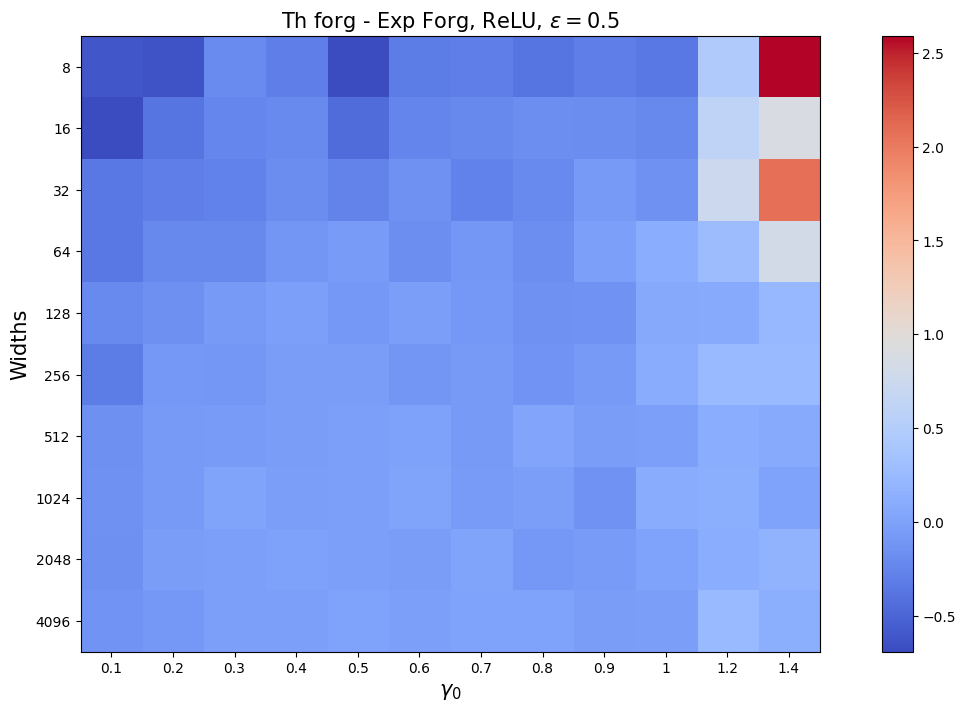

In [16]:
fig = plt.figure(figsize=(16,8))
plt.title('Th forg - Exp Forg, ReLU, $\epsilon = 0.5$', fontsize=15)
emp_forg = (l_w[:,:,0,-1]-l_w[:,:,0,epochs])/(l_w[:,:,0,epochs])
th_forg = (th_w[:,:,0,-1]-th_w[:,:,0,epochs])/(th_w[:,:,0,epochs])

plt.imshow((th_forg-emp_forg).T , cmap='coolwarm')
plt.yticks(np.arange(0,len(widths),1),widths)
plt.ylabel('Widths', fontsize=15)
plt.xlabel('$\gamma_0$', fontsize=15)
plt.xticks(np.arange(0,len(gammas),1),gammas)
plt.colorbar()

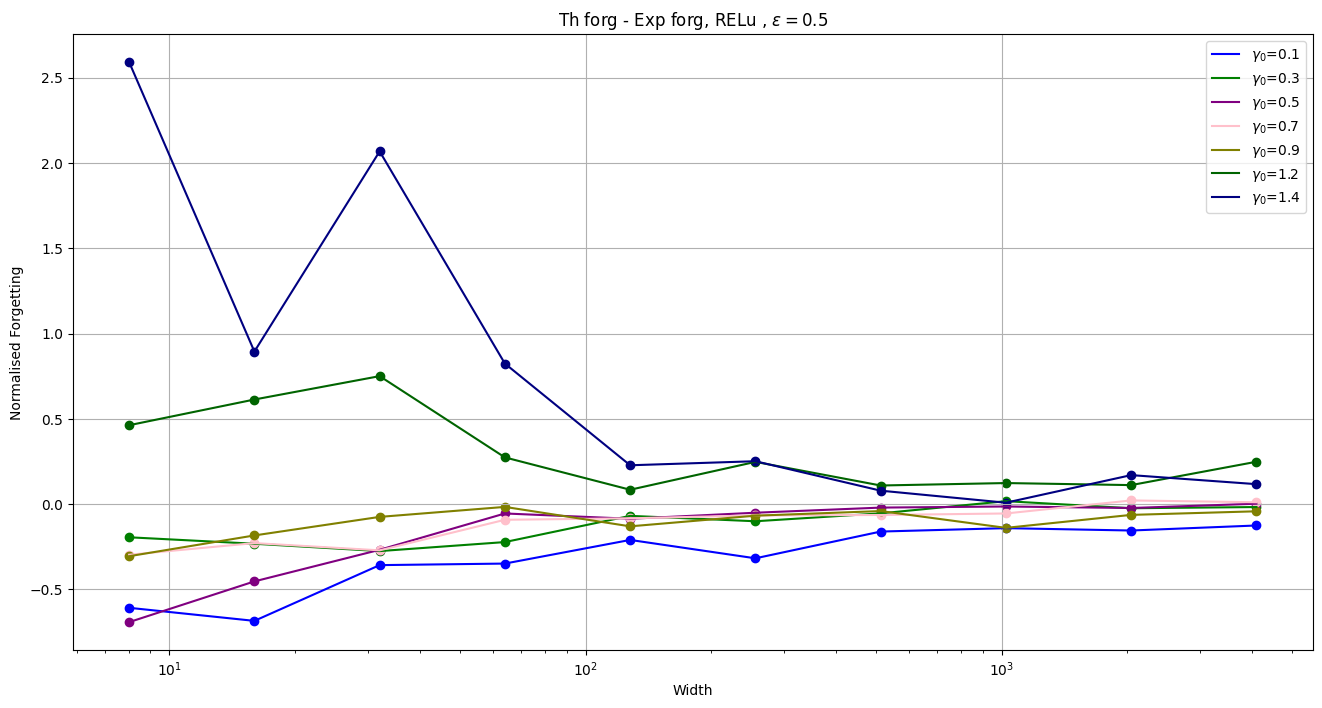

In [17]:
fig = plt.figure(figsize=(16,8))
for i in np.arange(0,len(gammas),2):
    plt.plot(widths,(th_forg-emp_forg)[i,:], label=f'$\gamma_0$={gammas[i]}', color=colors[i])
    plt.scatter(widths,(th_forg-emp_forg)[i,:],  color=colors[i]) 

plt.plot(widths,(th_forg-emp_forg)[-1,:], label=f'$\gamma_0$={gammas[-1]}', color=colors[-1])
plt.scatter(widths,(th_forg-emp_forg)[-1,:],  color=colors[-1]) 
plt.grid()
plt.xlabel('Width')
plt.ylabel('Normalised Forgetting')
plt.xscale('log')
plt.title('Th forg - Exp forg, RELu , $\epsilon=0.5$')
plt.legend()
plt.show()